In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import svd
# conda install tensorflow
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate

In [19]:
from tensorflow.keras import datasets

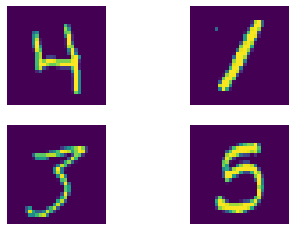

In [20]:
train, test = datasets.mnist.load_data()
xtrain, ytrain = train

np.random.seed(3141)
indices = np.random.choice(np.arange(len(xtrain)), size=4)
fig, ax = plt.subplots(2, 2)
for axi, ix in zip(ax.ravel(), indices):
    axi.imshow(xtrain[ix])
    axi.axis("off")

<h2 style="color:crimson">Ejercicio</h2>

**Entrenando un modelo con PCA**  
Considerando  `xtrain`, `ytrain` definido en las céldas de arriba, crea dos modelos: 
1. Un pipeline considerando PCA con `n_components=0.7` seguido de un modelo `KNeighborsClassifier` con `n_neighbors=5`
2. `KNeighborsClassifier` con `n_neighbors=5`

Realiza un *cross validation* con `n_components=3`.
* ¿Qué resultados arroja cada modelo?
* ¿que ventajas tiene cada modelo?
* ¿Cuánto tarda en correr cada *cross-validation*?

In [21]:
xtrain.shape

(60000, 28, 28)

In [22]:
#redifinimos xtrain  en sus dimensiones:
xtr=xtrain.reshape(xtrain.shape[0],xtrain.shape[1]*xtrain.shape[2])
xtr.shape

(60000, 784)

In [23]:
ytrain=ytrain.reshape(-1,1)
ytrain.shape

(60000, 1)

In [24]:
pipe1=Pipeline([('pca7',PCA(n_components=.7)),('knn5',KNeighborsClassifier(n_neighbors=5))])

In [25]:
KNN=KNeighborsClassifier(n_neighbors=5)

**Pipeline 1**

In [26]:
%%time
cv1=cross_validate(pipe1,xtr,ytrain,cv=3,scoring="accuracy",n_jobs=-1)

Wall time: 1min 16s


In [27]:
acc=cv1["test_score"]
print(f"mean accuracy: {acc.mean():0.2f}")
print(f"std accuracy: {acc.std():0.2f}")
#print(f"intervalo: {(cv1["test_score"].mean()+ np.array([-1, 1]) * cv1["test_score"].std()):0.2f}")
#cv["test_r2"].mean()+ np.array([-1, 1]) * cv["test_r2"].std()

mean accuracy: 0.97
std accuracy: 0.00


In [28]:
%%time
cv2=cross_validate(KNN,xtr,ytrain,cv=3,scoring="accuracy",n_jobs=-1)

Wall time: 40min 53s


In [29]:
acc2=cv2["test_score"]
print(f"mean accuracy: {acc2.mean():0.2f}")
print(f"std accuracy: {acc2.std():0.2f}")

mean accuracy: 0.97
std accuracy: 0.00


In [48]:
plt.style.use("fivethirtyeight")

El número de componentes que representan el 70% de la varianza es: 26


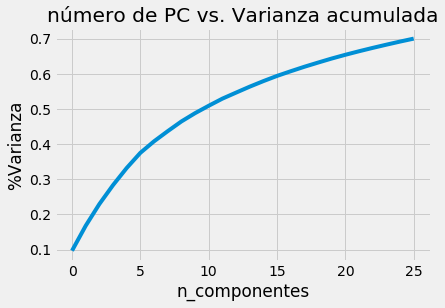

In [49]:
pca=PCA(n_components=.7).fit(xtr)
print(f"El número de componentes que representan el 70% de la varianza es: {pca.n_components_}")
explained_variance = pca.explained_variance_ratio_
var1=np.cumsum(explained_variance)

ax = plt.axes()
plt.plot(var1) 
ax.set_xlabel('n_componentes')
ax.set_ylabel('%Varianza')
ax.set_title('número de PC vs. Varianza acumulada')
plt.show()

**El cross validation tarda 1 min 2 seg para el pipeline y 40 mins para el KNN, el pipe1 tiene un 97% de accuracy y KNN tiene el mismo resultado, lo interesante e importante es recuciendo la dimensionalidad llegamos al mismo resultado pero con un tiempo 40 veces menor y con 26 variables en vez de 784, por tanto esa es la ventaja de hacer PCA antes de modelar...**

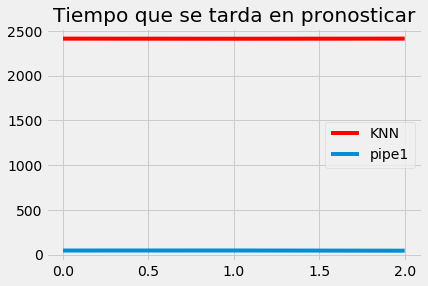

In [51]:
plt.plot(cv2['score_time'],color='r',label="KNN")
plt.plot(cv1['score_time'],label="pipe1")
plt.title("Tiempo que se tarda en pronosticar")
plt.legend()